## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

## 2. Load Dataset

In [2]:
dataset = '/content/obesity.csv'

df = pd.read_csv(dataset)
print(f'The shape dataset is {df.shape}')

The shape dataset is (2111, 19)


### - Describe Columns Dataset

In [3]:
'''
Gender (Jenis Kelamin):
1 jika responden adalah laki-laki
0 jika responden adalah perempuan
Age (Usia):

Usia responden dalam tahun
Family History with Overweight (Riwayat Keluarga dengan Kegemukan):
1 jika responden memiliki anggota keluarga yang mengalami atau pernah mengalami kegemukan
0 jika tidak

FAVC (Pola Makan Tinggi Kalori):
1 jika responden sering mengonsumsi makanan tinggi kalori
0 jika tidak
FCVC (Pola Makan Sayuran):

1 jika responden biasanya mengonsumsi sayuran dalam makanannya
0 jika tidak
NCP (Jumlah Makan Utama Harian):

0 untuk 1-2 kali makan
1 untuk 3 kali makan
2 untuk lebih dari 3 kali makan
CAEC (Konsumsi Makanan Antara Makanan Utama):

Skala 0 hingga 3 menunjukkan seberapa banyak makanan yang dikonsumsi responden di antara waktu makan.
SMOKE (Merokok):

1 jika responden merokok
0 jika tidak
CH2O (Konsumsi Air):

Skala 0 hingga 2 menunjukkan seberapa banyak air yang dikonsumsi responden.
SCC (Pemantauan Asupan Kalori):

1 jika responden memantau asupan kalorinya
0 jika tidak
FAF (Aktivitas Fisik):

Skala 0 hingga 3 menunjukkan seberapa banyak aktivitas fisik yang dilakukan responden.
TUE (Waktu Menggunakan Perangkat dengan Layar):

Skala 0 hingga 2 menunjukkan seberapa banyak waktu responden menghabiskan untuk melihat perangkat dengan layar.
CALC (Konsumsi Alkohol):

Skala 0 hingga 3 menunjukkan seberapa sering responden mengonsumsi alkohol.
Automobile, Bike, Motorbike, Public_Transportation, Walking (Transportasi Utama):

1 menunjukkan moda transportasi utama responden, sementara kolom lainnya berisi nilai 0.
NObeyesdad (Status Obesitas):

1 jika pasien mengalami obesitas
0 jika tidak
'''

'\nGender (Jenis Kelamin):\n1 jika responden adalah laki-laki\n0 jika responden adalah perempuan\nAge (Usia):\n\nUsia responden dalam tahun\nFamily History with Overweight (Riwayat Keluarga dengan Kegemukan):\n1 jika responden memiliki anggota keluarga yang mengalami atau pernah mengalami kegemukan\n0 jika tidak\n\nFAVC (Pola Makan Tinggi Kalori):\n1 jika responden sering mengonsumsi makanan tinggi kalori\n0 jika tidak\nFCVC (Pola Makan Sayuran):\n\n1 jika responden biasanya mengonsumsi sayuran dalam makanannya\n0 jika tidak\nNCP (Jumlah Makan Utama Harian):\n\n0 untuk 1-2 kali makan\n1 untuk 3 kali makan\n2 untuk lebih dari 3 kali makan\nCAEC (Konsumsi Makanan Antara Makanan Utama):\n\nSkala 0 hingga 3 menunjukkan seberapa banyak makanan yang dikonsumsi responden di antara waktu makan.\nSMOKE (Merokok):\n\n1 jika responden merokok\n0 jika tidak\nCH2O (Konsumsi Air):\n\nSkala 0 hingga 2 menunjukkan seberapa banyak air yang dikonsumsi responden.\nSCC (Pemantauan Asupan Kalori):\n\n1 jik

## 3. Data Understanding

In [4]:
df.sample(5)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
968,0,31.793937,1,1,2.372494,2.849848,1,0,1.028538,0,0.675983,0.303025,1,1,0,0,0,0,0
374,1,18.000000,1,1,2.000000,4.000000,2,0,2.000000,0,2.000000,1.000000,1,1,0,0,0,0,0
539,0,18.540535,0,1,2.658112,1.000000,1,0,1.298165,0,0.000000,1.639326,1,0,0,0,1,0,0
2088,0,26.000000,1,1,3.000000,3.000000,1,0,2.584305,0,0.000000,0.232108,1,0,0,0,1,0,1
359,0,33.000000,1,0,2.000000,3.000000,1,0,2.000000,0,1.000000,0.000000,1,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [6]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

In [7]:
col = [i for i in df.columns if df[i].dtypes == 'float64']

df[col].describe()

,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
print(col)

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [9]:
features = col

for i in features:
  print(f'Value Counts Col {i}')
  print(df[i].value_counts())
  print()

Value Counts Col Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

Value Counts Col FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64

Value Counts Col NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64

Value Counts Col CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: CH2O, Length: 1268, dtype: int64

Value Counts Col FAF
0.000000   

## 3. Feature Engineering

In [10]:
drop_col = ['family_history_with_overweight', 'SCC', 'TUE', 'Automobile', 'Bike', 'Motorbike', 'Walking', 'Public_Transportation']

df_clean = df.drop(drop_col, axis=1)
df_clean.head()

,Gender,Age,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,NObeyesdad
0,0,21.0,0,2.0,3.0,1,0,2.0,0.0,0,0
1,0,21.0,0,3.0,3.0,1,1,3.0,3.0,1,0
2,1,23.0,0,2.0,3.0,1,0,2.0,2.0,2,0
3,1,27.0,0,3.0,3.0,1,0,2.0,2.0,2,0
4,1,22.0,0,2.0,1.0,1,0,2.0,0.0,1,0


In [11]:
df_clean.isnull().sum()

Gender        0
Age           0
FAVC          0
FCVC          0
NCP           0
CAEC          0
SMOKE         0
CH2O          0
FAF           0
CALC          0
NObeyesdad    0
dtype: int64

In [12]:
df_clean.duplicated().sum()

41

In [13]:
duplicate_rows = df_clean[df_clean.duplicated()]

print("Data Duplikat:")
duplicate_rows

Data Duplikat:


,Gender,Age,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC,NObeyesdad
47,1,21.0,1,1.0,3.0,2,0,3.0,2.0,1,0
60,0,21.0,1,2.0,3.0,1,0,3.0,3.0,1,0
98,0,21.0,0,3.0,1.0,2,0,1.0,0.0,1,0
106,0,25.0,1,2.0,1.0,1,0,2.0,2.0,1,0
118,1,23.0,1,2.0,3.0,1,0,2.0,1.0,1,0
174,1,21.0,1,2.0,1.0,0,0,3.0,1.0,1,0
179,1,21.0,1,2.0,1.0,0,0,3.0,1.0,1,0
184,1,21.0,1,2.0,1.0,0,0,3.0,1.0,1,0
209,0,22.0,1,2.0,3.0,1,0,2.0,1.0,1,0
273,1,25.0,1,2.0,3.0,2,0,2.0,0.0,1,0


In [14]:
df_clean = df_clean.drop_duplicates()

df_clean.duplicated().sum()

0

In [15]:
col_float = [i for i in df_clean.columns if df_clean[i].dtype == 'float64']

df_clean[col_float] = df_clean[col_float].astype('int64')
df_clean.dtypes

<ipython-input-15-31fe23733643>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col_float] = df_clean[col_float].astype('int64')


Gender        int64
Age           int64
FAVC          int64
FCVC          int64
NCP           int64
CAEC          int64
SMOKE         int64
CH2O          int64
FAF           int64
CALC          int64
NObeyesdad    int64
dtype: object

## 4. Eksploratory Data Analysis (EDA)

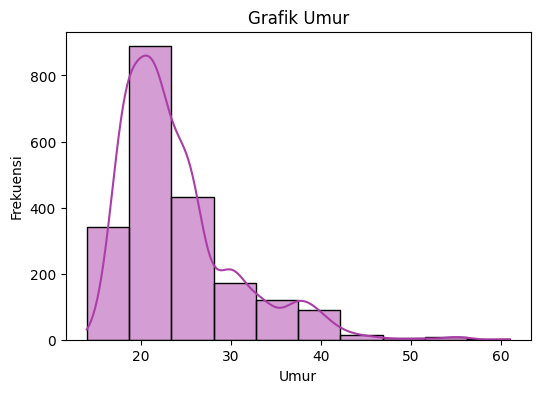

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=df_clean, x='Age', bins=10, kde=True, color='#ab3da9')
plt.title('Grafik Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

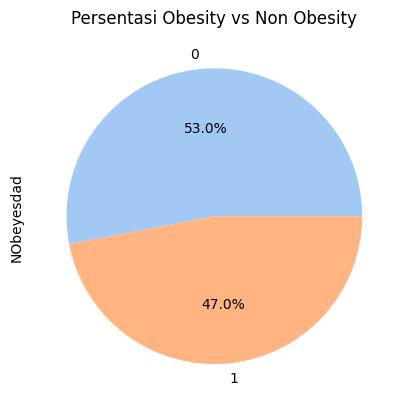

In [17]:
sns.set_palette('pastel')
df_clean['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentasi Obesity vs Non Obesity')
plt.show()

<ipython-input-18-a379a3cdee78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_clean, x='NObeyesdad', palette='rocket')


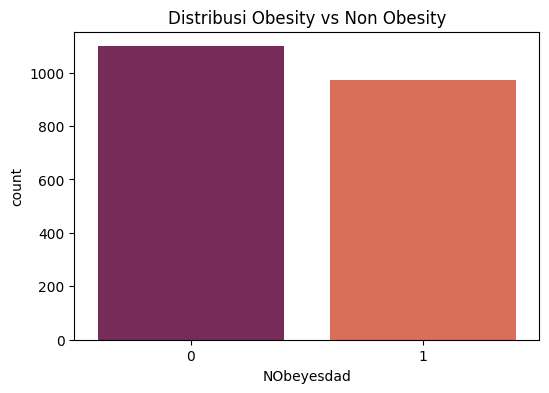

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(df_clean, x='NObeyesdad', palette='rocket')
plt.title('Distribusi Obesity vs Non Obesity')
plt.show()

<Axes: >

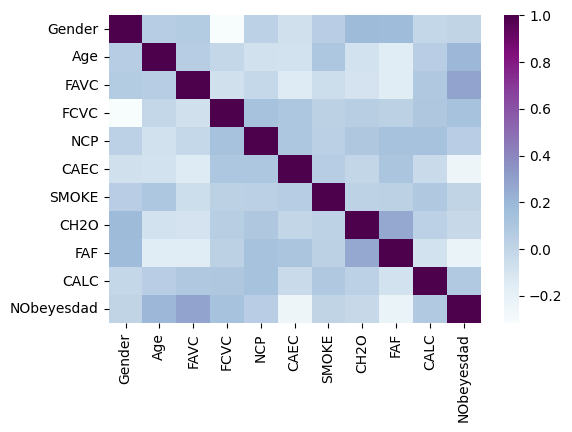

In [19]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean.corr(), cmap='BuPu')

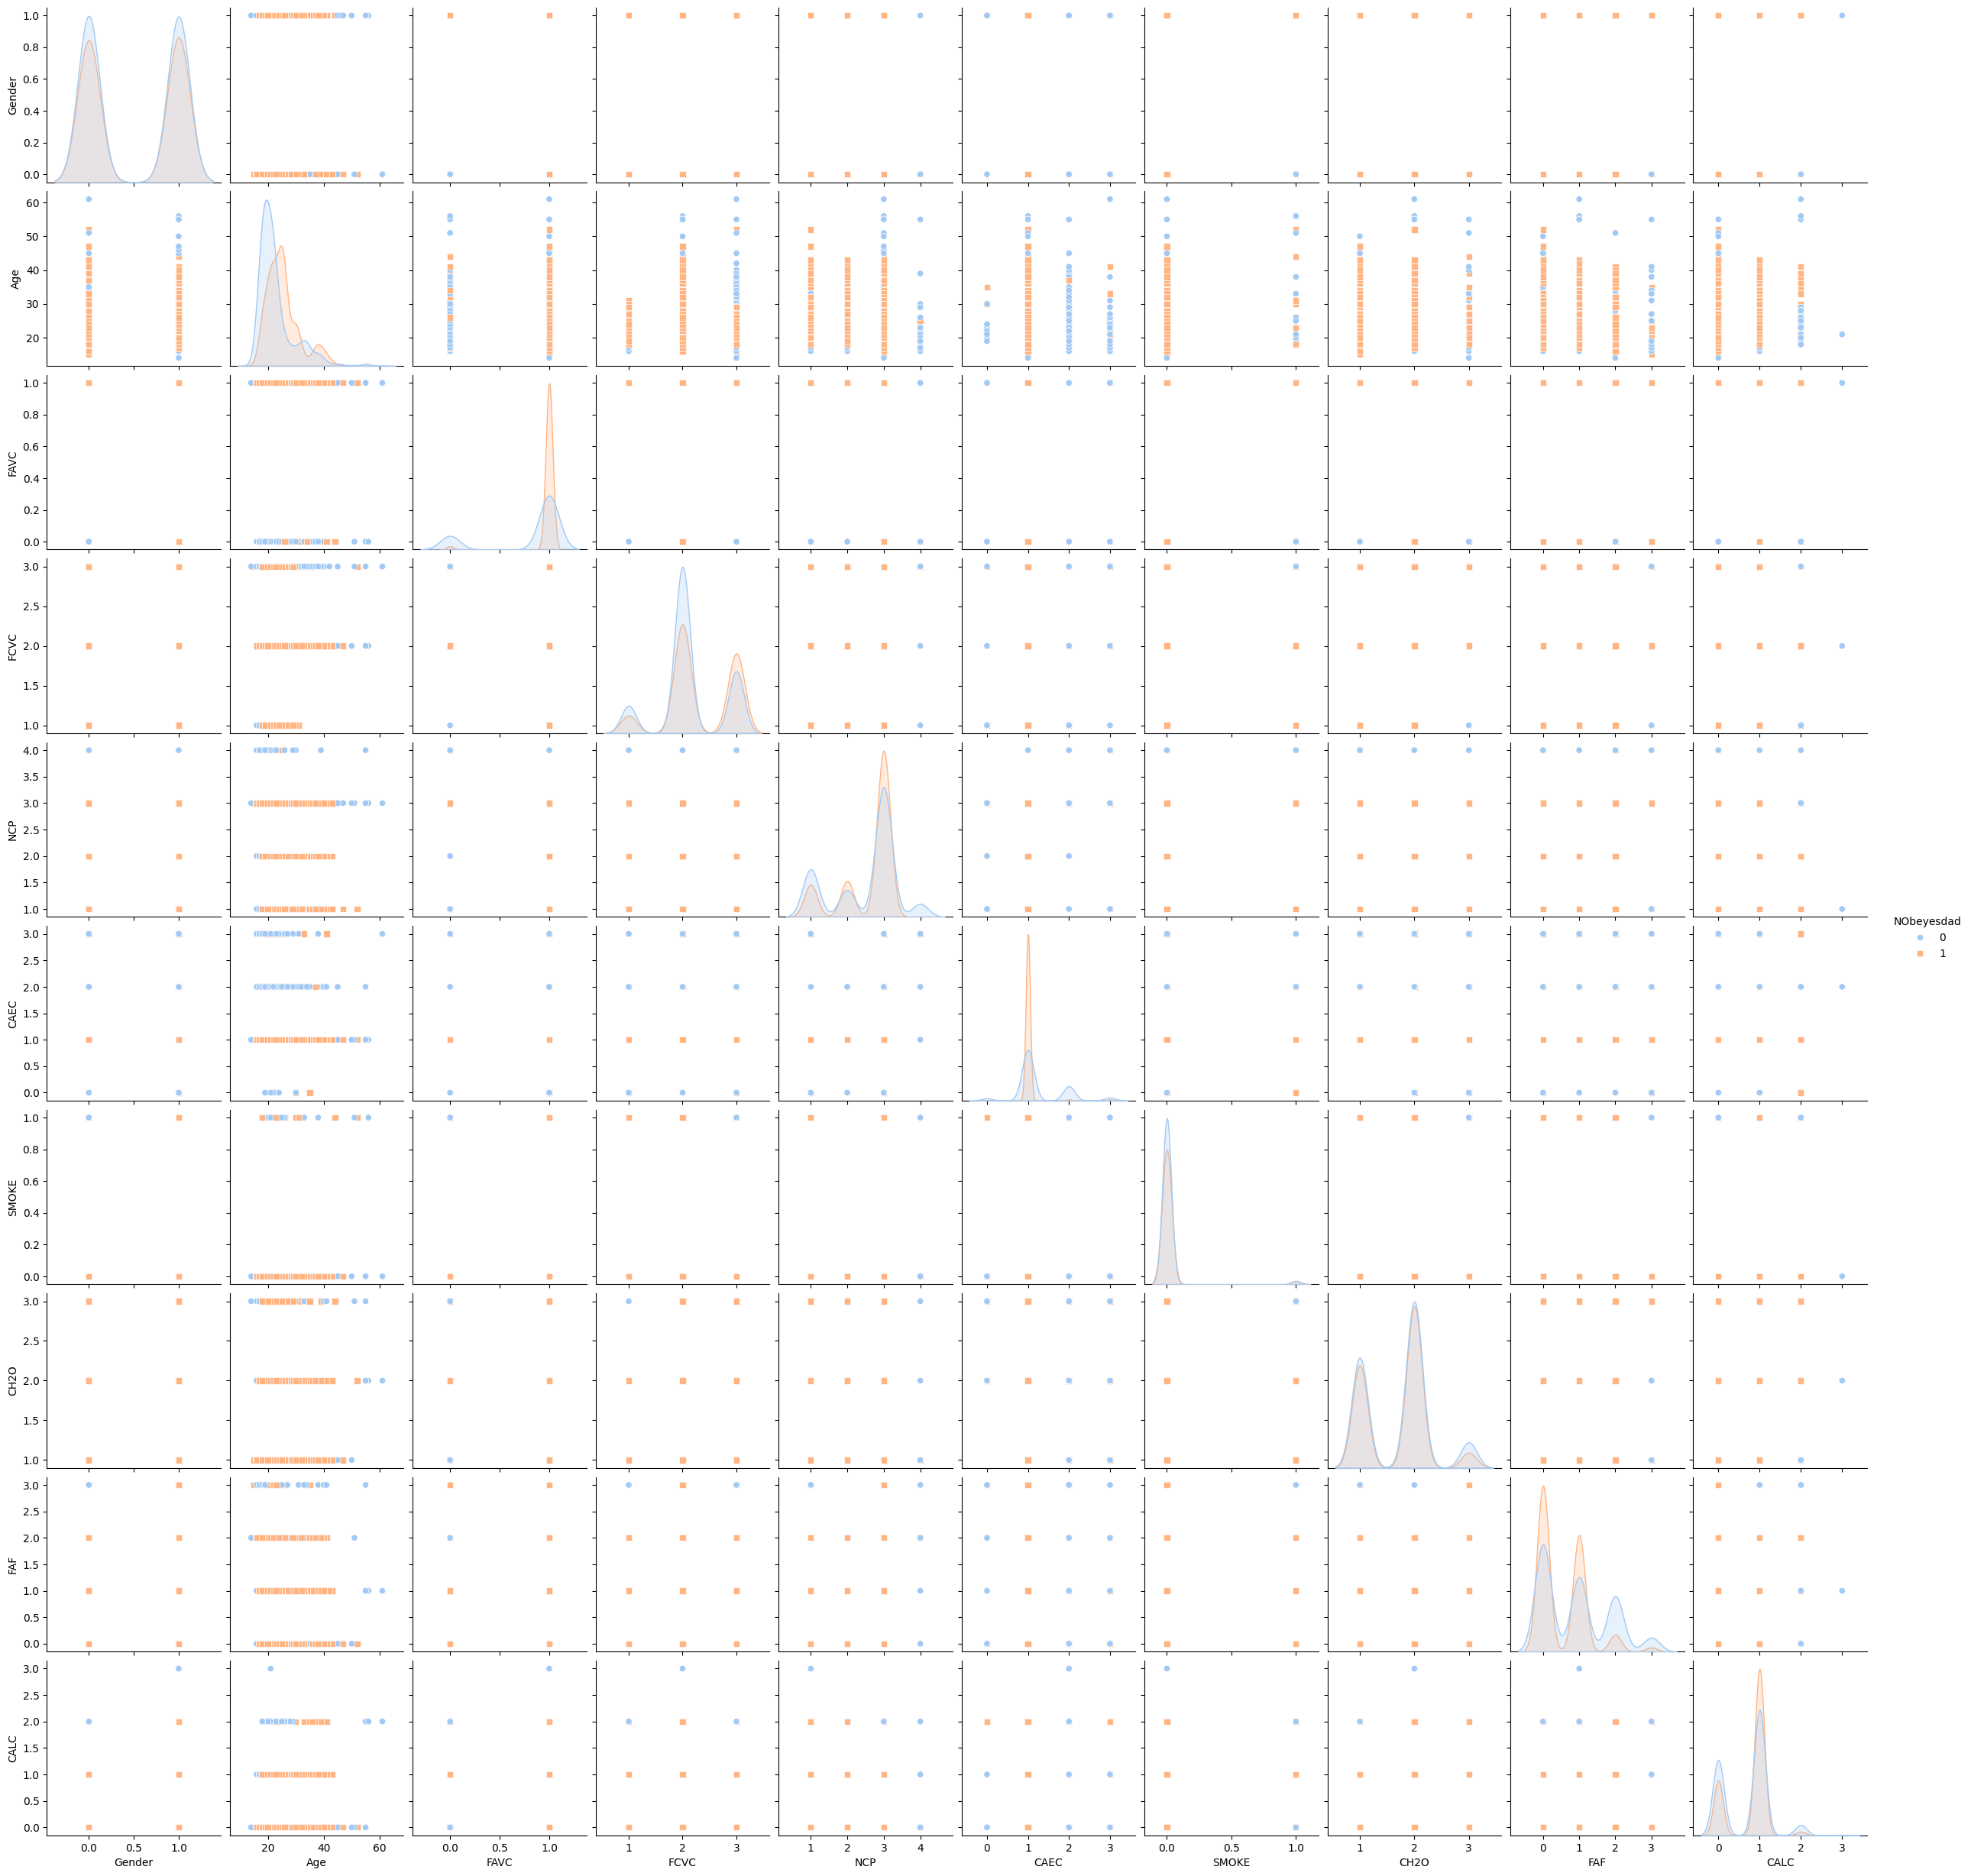

In [20]:
sns.pairplot(df_clean, hue='NObeyesdad', markers=['o', 's'])
plt.show()

## 5. Data Preprocessing

In [21]:
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

print(f'X = {X.shape}')
print(f'y = {y.shape}')

X = (2070, 10)
y = (2070,)


In [22]:
sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

In [23]:
print("Data Setelah Transformasi:")
print(X)

Data Setelah Transformasi:
[[-1.00387223 -0.47985456 -2.75485238 ...  0.50024047 -0.87539154
  -1.41398102]
 [-1.00387223 -0.47985456 -2.75485238 ...  2.19223028  2.71759025
   0.52054688]
 [ 0.99614271 -0.16457161 -2.75485238 ...  0.50024047  1.51992965
   2.45507478]
 ...
 [-1.00387223 -0.32221309  0.36299586 ...  0.50024047  0.32226906
   0.52054688]
 [-1.00387223 -0.00693013  0.36299586 ...  0.50024047  0.32226906
   0.52054688]
 [-1.00387223 -0.16457161  0.36299586 ...  0.50024047  0.32226906
   0.52054688]]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Modelling & Evaluation

In [25]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Accuracy score : {:.2f}%'.format(svm_acc*100))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       216
           1       0.70      0.79      0.74       198

    accuracy                           0.74       414
   macro avg       0.74      0.74      0.74       414
weighted avg       0.74      0.74      0.74       414

Accuracy score : 73.67%


In [26]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print('Accuracy score : {:.2f}%'.format(svm_acc*100))

Best Hyperparameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       216
           1       0.86      0.88      0.87       198

    accuracy                           0.87       414
   macro avg       0.87      0.87      0.87       414
weighted avg       0.87      0.87      0.87       414

Accuracy score : 87.44%


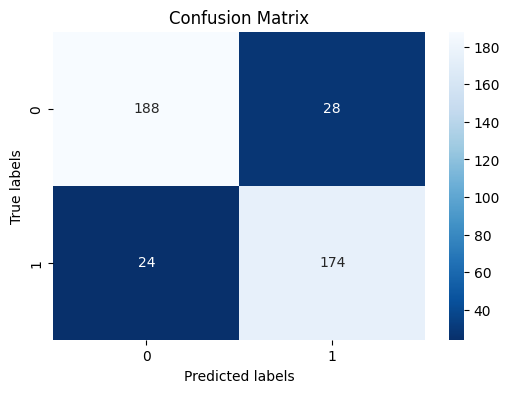

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues_r', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 7. Testing

In [28]:
data_tes = pd.DataFrame({
    'Gender': [1], # 1 = laki", 0 = pr
    'Age': [18], # umur biasa
    'FAVC': [1], # 1 = True, 0 = False
    'FCVC': [3], # Skala 0 hingga 3 menunjukkan seberapa sering makan sayuran
    'NCP': [2], # 0 = 1-2 x makan, 1 = 3 x makan, 2 = > 3 x makan
    'CAEC': [1], # Skala 0 hingga 3 menunjukkan seberapa banyak makanan yang dikonsumsi responden di antara waktu makan.
    'SMOKE': [0], # 1 = True, 0 = False
    'CH2O': [2], # Skala 0 hingga 2 menunjukkan seberapa banyak air yang dikonsumsi responden.
    'FAF': [2], # Skala 0 hingga 3 menunjukkan seberapa banyak aktivitas fisik yang dilakukan responden.
    'CALC': [0] # Skala 0 hingga 3 menunjukkan seberapa sering responden mengonsumsi alkohol
})

data_tes

,Gender,Age,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,CALC
0,1,18,1,3,2,1,0,2,2,0


In [29]:
scaled_data_tes = sc.transform(data_tes)
data_pred = svm.predict(scaled_data_tes)

print(f'Diagnosis Data Baru : {data_pred}')

# 0 = Not Obesity
# 1 = Obesity

Diagnosis Data Baru : [1]
